# Probability: the normal distribution

implemented as _scipy.stats.norm_ See: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

### Probability density function (PDF)

```
norm.pdf
```

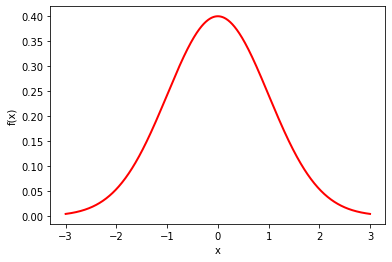

In [16]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

# Parameters of the normal distribution
mu = 0
sig = 1
N = 1000

# ----------------------------------------
# Plot the PDF of the normal distribution
# ----------------------------------------
x = np.linspace(mu-3*sig, mu+3*sig,N) # Trace from -3sigma to 3sigma around the mean

plt.plot(x, norm.pdf(x,mu,sig),'r-', lw=2, label='norm pdf')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()

### Cumulative distribution function: $cdf(x) = P(valor \leq x)$

```
norm.cdf
```

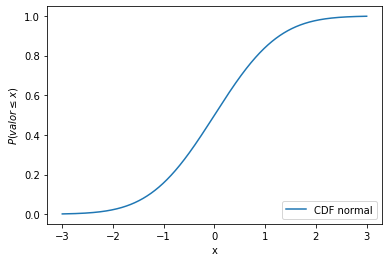

In [6]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

# Parameters of the normal distribution
mu = 0
sig = 1
N = 1000

# ----------------------------------------
# Plot the CDF of the normal distribution
# ----------------------------------------
x = np.linspace(mu-3*sig,mu+3*sig, N)

plt.plot(x, norm.cdf(x,mu,sig), label= 'CDF normal')
plt.ylabel('$P(valor \leq x)$')
plt.xlabel('x')
plt.legend(loc=4)
plt.show()

### Quantile function (or percent point function): value for which the CDF is x
```
norm.ppf
```

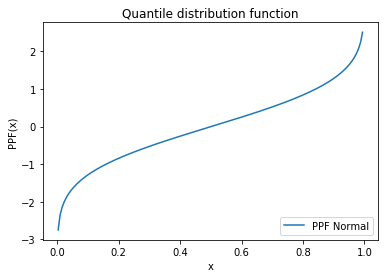

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters of the normal distribution
mu = 0
sig = 1
N = 1000

# -------------------------------------------
# Plot the QF/PPF of the normal distribution
# -------------------------------------------
x = np.linspace(mu-3*sig,mu+3*sig, N)

plt.plot(x, norm.ppf(x,mu,sig), label='PPF Normal')
plt.title('Quantile distribution function')
plt.ylabel('PPF(x)')
plt.xlabel('x')
plt.legend(loc=4)
plt.show()

### Generation of normally distributed random numbers

We use the numpy function  

```
np.random.normal
```

and also other numpy functions to obtain basic statistics of the sample

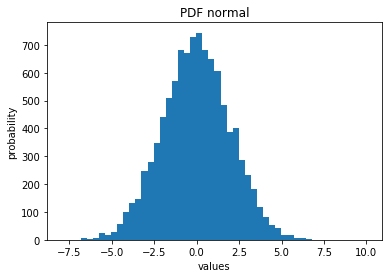

PDF mean, var, skew, kurt = 0.0 1.0 0.0 0.0
ppf(25%) -1.3489795003921634
ppf(75%) 1.3489795003921634
------------
mean: -0.03122582729249244
median: -0.027937393468087043
std: 1.990451762182279 var= 3.96189821757454
q(25%): -1.3656287048245521
q(75%): 1.2938255629891928


In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# Parameters of the normal distribution
mu = 0
sig = 2
N = 10000

# Generate points
x = np.random.normal(mu, sig, N)

# Generate histogram
count, bins, ignored = plt.hist(x, 50)

plt.title('PDF normal')
plt.ylabel('probability')
plt.xlabel('values')
plt.show()

# Moments of the distribution from the PDF
mvs= norm.stats(moments='mvsk')
print('PDF mean, var, skew, kurt =', mvs[0],mvs[1],mvs[2],mvs[3])
print("ppf(25%)",norm.ppf(0.25,mu,sig))
print("ppf(75%)",norm.ppf(0.75,mu,sig))
print(12*'-')

# Observed values from the sample
print('mean:', np.mean(x))
print('median:', np.median(x))
print('std:', np.std(x), "var=",np.var(x))
print('q(25%):', np.percentile(x, 25))
print('q(75%):', np.percentile(x, 75))

### Compare the theoretical CDF with the empirical CDF

we use
´´´
statsmodels.distributions.empirical_distribution.ECDF
´´´

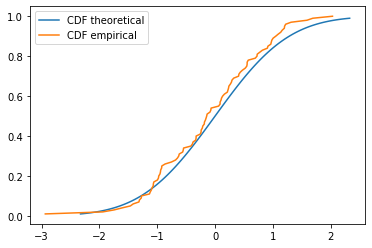

In [3]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.distributions.empirical_distribution as stm

# Parameters of the normal distribution
mu = 0
sig = 1
N = 100

# Generate normal sample
x = np.random.normal(mu, sig,N) 

# Theoretical CDF
y = np.linspace(norm.ppf(0.01,mu,sig),norm.ppf(0.99,mu,sig), N)
fda_norm = norm.cdf(y,mu,sig) 
plt.plot(y, fda_norm, label = 'CDF theoretical')

# Calculate and plot empirical CDF
ecdf = stm.ECDF(x)
plt.plot(ecdf.x,ecdf.y,label = 'CDF empirical')

plt.legend(loc ='upper left')
plt.show()

### Compare histogram of values with prediction from PDF

predicted value in bin $[x_i,x_{i+1}]$

$N\int_{x_i}^{x_{i+1}}pdf(x) \: dx = N \left( cdf(x_{i+1}) - cdf(x_i) \right)$


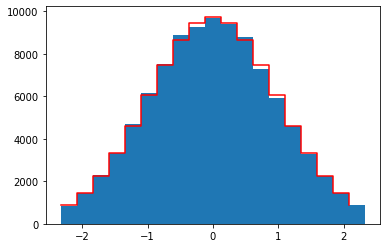

In [16]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt

# Parameters of the normal distribution
mu = 0
sig = 1
N = 100000

# Generate normal sample
x = np.random.normal(mu, sig,N) 

# Define bins of the histogram; choose limits using the 
# quantile function to an interval with relevant values
bins= np.linspace(norm.ppf(0.01,mu,sig), norm.ppf(0.99,mu,sig), 20)

# Plot histogram
h= plt.hist(x,bins)

# Calculate predicted bin value by substractig CDF values at the borders
pred_x= []
pred_y= []
for i in range(len(bins)-1):
    pred_x.append( bins[i] )
    pred_y.append( N * ( norm.cdf(bins[i+1],mu,sig) - norm.cdf(bins[i],mu,sig) ) )

p= plt.step(pred_x,pred_y,where="post",color="red")


## Quantile-quantile plots

See: http://en.wikipedia.org/wiki/Q%E2%80%93Q_plot

We can use the qqplots to check a sample against a PDF and see if they are compatible

### First, check normal sample against a normal PDF

We use _qqplot_ from _statsmodel_ 

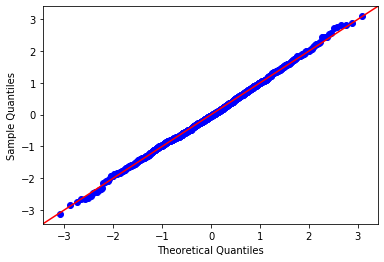

In [3]:
%matplotlib inline
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Parameters of the normal distribution
mu = 0
sig = 1
N = 1000

# Generate normal sample
x = np.random.normal(mu, sig,N) 

sm.qqplot(x, line='45') # By default the comparison distribution is normal

plt.show()

### Alternative to compare with other distributions

Use _probplot_ from _scipy.stats_

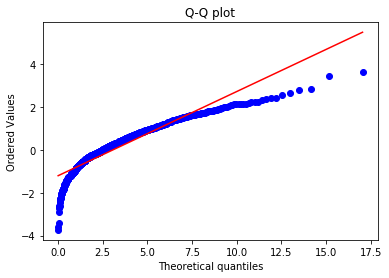

In [17]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Parameters of the normal distribution
mu = 0
sig = 1
N = 1000

# Generate normal sample
x = np.random.normal(mu, sig, N) 

#stats.probplot(x, dist="norm", plot=plt)
stats.probplot(x, dist=stats.chi2(3), plot=plt)

plt.title("Q-Q plot")

plt.show()

### Now we do the qqplot with a non-matching pdf

Uniform sample vs. normal PDF

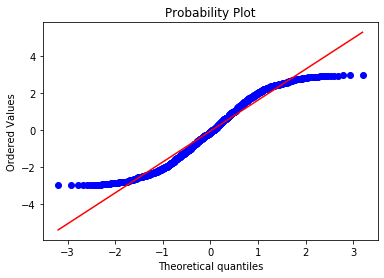

In [6]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

x =np.random.uniform(low = -3, high = 3, size=1000)
stats.probplot(x, dist="norm",  plot=plt)

plt.show()

Normal sample vs. uniform PDF

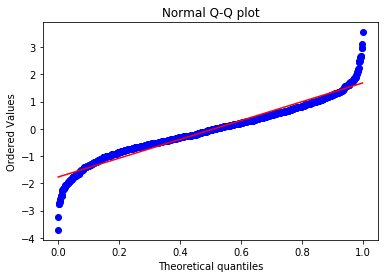

In [48]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Parameters of the normal distribution
mu = 0
sig = 1
N = 1000

# Generate normal sample
x = np.random.normal(mu, sig,N) 

stats.probplot(x, dist="uniform", plot=plt)
plt.title("Normal Q-Q plot")

plt.show()

### Using qqplot to compare samples

If you have two samples you can use qqplots to compare them and assess if they come from the same PDF.

First we compare a uniform sample with a normal sample

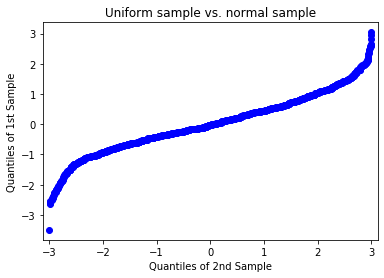

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.gofplots import qqplot_2samples

# Normal sample
x = np.random.standard_normal(1000)

# Uniform sample
y =np.random.uniform(low = -3, high = 3, size=1000)

qqplot_2samples(x, y,)

plt.title('Normal sample vs. uniform sample')
plt.show()

Two normal samples with the same parameters

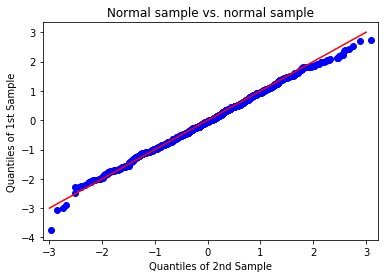

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.graphics.gofplots as gofp

# First normal sample
x = np.random.normal(0, 1, 1000) 

# Second normal sample
x = np.random.normal(0, 1, 1000) 

gofp.qqplot_2samples(x, y,)
plt.plot([-3,3],[-3,3],"-r")

plt.title('Normal sample vs. normal sample')
plt.show()

Two normal samples with different parameters

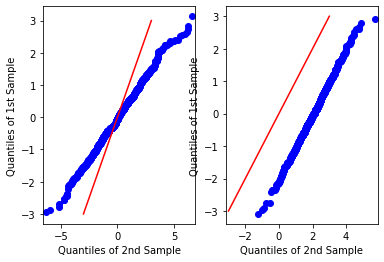

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.graphics.gofplots as gofp

# First normal sample
x = np.random.normal(0, 1, 1000) 

# Second normal sample
y = np.random.normal(0, 2, 1000) 

p1= plt.subplot(1,2,1)
gofp.qqplot_2samples(x, y, ax=p1)
plt.plot([-3,3],[-3,3],"-r")


# First normal sample
x = np.random.normal(0, 1, 1000) 

# Second normal sample
y = np.random.normal(2, 1, 1000) 

p2= plt.subplot(1,2,2)
gofp.qqplot_2samples(x, y, ax=p2)
plt.plot([-3,3],[-3,3],"-r")

plt.show()

Corollary: a sample vs. itself is a perfect straight line

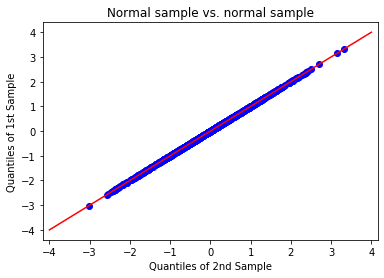

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.graphics.gofplots as gofp

# Normal sample
x = np.random.normal(0, 1, 1000) 

gofp.qqplot_2samples(x, x)
plt.plot([-4,4],[-4,4],"-r")

plt.title('Normal sample vs. normal sample')
plt.show()